### Script to include finite source size on simulated 4DSTEM data
Runs on submit node at MSCdata cluster
After source size considered, (Depthn, slicek) should be compared to (Depth0, slice26-n+k)

In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
from scipy import signal
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import mrcfile
import scipy

In [2]:
def gaussKernel(sigma,imsize):
    x,y = np.meshgrid(range(1,imsize+1),range(1,imsize+1))
    x = x - imsize//2
    y = y - imsize//2
    tmp = -(x**2+y**2)/(2*sigma**2)
    return (1/(2*np.pi*sigma**2))*np.exp(tmp)

In [9]:
for depth in range(4,10):
    folder = '/srv/home/chenyu/antisite/PRISMATIC/Depth'+str(depth)+'/'
    for slc in range(depth):
        base_name = 'depth'+str(depth)+'_slice'+str(slc)
        base_ext = '_FPavg.npy'
        array_size = (69,69)

        imsize = (np.load(folder+base_name+'_X0_Y0'+base_ext)).shape
        out_sz = array_size + imsize
        output = np.zeros(out_sz,dtype=np.float32)
        for x in range(array_size[0]):
            for y in range(array_size[1]):
                output[x,y,:,:] = np.load(folder+base_name+'_X'+str(x)+'_Y'+str(y)+base_ext)
        output = np.squeeze(output)
        

        px_size = 17.5
        
        for ss in range(1):
            source_size = 90 + ss*10
            sigma = (source_size/px_size)/(2.355)
            kernel = gaussKernel(sigma,array_size[0])
            fkernel = np.fft.fft2(kernel)
            kx,ky = output.shape[2:4]
            #initialize result array
            result = np.zeros(out_sz,dtype=np.float32)
            result = np.squeeze(result)
            for k in range(kx):
                for l in range(ky):
                    #apply convolution for each pixel in (kx,ky) over the whole set of images in (x,y)
                    result[:,:,k,l] = np.fft.fftshift(np.fft.ifft2(fkernel*np.fft.fft2(output[:,:,k,l]))).real
            np.save(folder+base_name+'_'+ str(source_size) + 'pmss.npy',result)
            print('Processed depth '+str(depth)+' slice '+str(slc) + ',source size:' +str(source_size))


Processed depth 4 slice 0,source size:90
Processed depth 4 slice 1,source size:90
Processed depth 4 slice 2,source size:90
Processed depth 4 slice 3,source size:90
Processed depth 5 slice 0,source size:90
Processed depth 5 slice 1,source size:90
Processed depth 5 slice 2,source size:90
Processed depth 5 slice 3,source size:90
Processed depth 5 slice 4,source size:90
Processed depth 6 slice 0,source size:90
Processed depth 6 slice 1,source size:90
Processed depth 6 slice 2,source size:90
Processed depth 6 slice 3,source size:90
Processed depth 6 slice 4,source size:90
Processed depth 6 slice 5,source size:90
Processed depth 7 slice 0,source size:90
Processed depth 7 slice 1,source size:90
Processed depth 7 slice 2,source size:90
Processed depth 7 slice 3,source size:90
Processed depth 7 slice 4,source size:90
Processed depth 7 slice 5,source size:90
Processed depth 7 slice 6,source size:90
Processed depth 8 slice 0,source size:90
Processed depth 8 slice 1,source size:90
Processed depth 

In [6]:
folder[-8:-5]

'0.2'

In [7]:
from glob import glob
path = '/srv/home/chenyu/antisite/PRISMATIC/Depth0_TiltSeries/*/'
print(len(glob(path)))

for idefocus in range(len(glob(path))):
    folder = glob(path)[idefocus]
    tilt = glob(path)[idefocus][-8:-5]
    if tilt == '0.2' or tilt == '0.6':
        
        for slc in range(1,26):
            base_name = 'depth0_slice'+str(slc)
            base_ext = '_FPavg.npy'
            array_size = (69,69)

            imsize = (np.load(folder+base_name+'_X0_Y0'+base_ext)).shape
            out_sz = array_size + imsize
            output = np.zeros(out_sz,dtype=np.float32)
            for x in range(array_size[0]):
                    for y in range(array_size[1]):
                        output[x,y,:,:] = np.load(folder+base_name+'_X'+str(x)+'_Y'+str(y)+base_ext)
            output = np.squeeze(output)

            for ss in range(5):
                source_size = 90 + ss*10
            #     source_size = 90
                px_size = 17.5
                sigma = (source_size/px_size)/(2.355)
                kernel = gaussKernel(sigma,array_size[0])
                fkernel = np.fft.fft2(kernel)
                kx,ky = output.shape[2:4]
                #initialize result array
                result = np.zeros(out_sz,dtype=np.float32)
                result = np.squeeze(result)
                for k in range(kx):
                    for l in range(ky):
                        #apply convolution for each pixel in (kx,ky) over the whole set of images in (x,y)
                        result[:,:,k,l] = np.fft.fftshift(np.fft.ifft2(fkernel*np.fft.fft2(output[:,:,k,l]))).real
                np.save(folder+base_name +'_' + str(source_size) + 'pmss.npy',result)
                print('Tilt: ' + tilt + ' slice '+str(slc) +' source size:' + str(source_size))

5
Tilt: 0.6 slice 1 source size:90
Tilt: 0.6 slice 1 source size:100
Tilt: 0.6 slice 1 source size:110
Tilt: 0.6 slice 1 source size:120
Tilt: 0.6 slice 1 source size:130
Tilt: 0.6 slice 2 source size:90
Tilt: 0.6 slice 2 source size:100
Tilt: 0.6 slice 2 source size:110
Tilt: 0.6 slice 2 source size:120
Tilt: 0.6 slice 2 source size:130
Tilt: 0.6 slice 3 source size:90
Tilt: 0.6 slice 3 source size:100
Tilt: 0.6 slice 3 source size:110
Tilt: 0.6 slice 3 source size:120
Tilt: 0.6 slice 3 source size:130
Tilt: 0.6 slice 4 source size:90
Tilt: 0.6 slice 4 source size:100
Tilt: 0.6 slice 4 source size:110
Tilt: 0.6 slice 4 source size:120
Tilt: 0.6 slice 4 source size:130
Tilt: 0.6 slice 5 source size:90
Tilt: 0.6 slice 5 source size:100
Tilt: 0.6 slice 5 source size:110
Tilt: 0.6 slice 5 source size:120
Tilt: 0.6 slice 5 source size:130
Tilt: 0.6 slice 6 source size:90
Tilt: 0.6 slice 6 source size:100
Tilt: 0.6 slice 6 source size:110
Tilt: 0.6 slice 6 source size:120
Tilt: 0.6 slice 6 

Tilt: 0.2 slice 23 source size:120
Tilt: 0.2 slice 23 source size:130
Tilt: 0.2 slice 24 source size:90
Tilt: 0.2 slice 24 source size:100
Tilt: 0.2 slice 24 source size:110
Tilt: 0.2 slice 24 source size:120
Tilt: 0.2 slice 24 source size:130
Tilt: 0.2 slice 25 source size:90
Tilt: 0.2 slice 25 source size:100
Tilt: 0.2 slice 25 source size:110
Tilt: 0.2 slice 25 source size:120
Tilt: 0.2 slice 25 source size:130


### CBED convolution for a specific path and different source sizes.

In [5]:
folder = '/srv/home/chenyu/antisite/PRISMATIC/Depth0_TiltSeries/0.15mrad/0.15mrad/'
for slc in range(0,26):
    base_name = 'depth0_slice'+str(slc)
    base_ext = '_FPavg.npy'
    array_size = (69,69)

    imsize = (np.load(folder+base_name+'_X0_Y0'+base_ext)).shape
    out_sz = array_size + imsize
    output = np.zeros(out_sz,dtype=np.float32)
    for x in range(array_size[0]):
            for y in range(array_size[1]):
                output[x,y,:,:] = np.load(folder+base_name+'_X'+str(x)+'_Y'+str(y)+base_ext)
    output = np.squeeze(output)

    for ss in range(5):
        source_size = 90 + ss*10
    #     source_size = 90
        px_size = 17.5
        sigma = (source_size/px_size)/(2.355)
        kernel = gaussKernel(sigma,array_size[0])
        fkernel = np.fft.fft2(kernel)
        kx,ky = output.shape[2:4]
        #initialize result array
        result = np.zeros(out_sz,dtype=np.float32)
        result = np.squeeze(result)
        for k in range(kx):
            for l in range(ky):
                #apply convolution for each pixel in (kx,ky) over the whole set of images in (x,y)
                result[:,:,k,l] = np.fft.fftshift(np.fft.ifft2(fkernel*np.fft.fft2(output[:,:,k,l]))).real
        np.save(folder+base_name +'_' + str(source_size) + 'pmss.npy',result)
        print('Processed depth0 slice '+str(slc) +' source size:' + str(source_size))

Processed depth0 slice 0 source size:90
Processed depth0 slice 0 source size:100
Processed depth0 slice 0 source size:110
Processed depth0 slice 0 source size:120
Processed depth0 slice 0 source size:130
Processed depth0 slice 1 source size:90
Processed depth0 slice 1 source size:100
Processed depth0 slice 1 source size:110
Processed depth0 slice 1 source size:120
Processed depth0 slice 1 source size:130
Processed depth0 slice 2 source size:90
Processed depth0 slice 2 source size:100
Processed depth0 slice 2 source size:110
Processed depth0 slice 2 source size:120
Processed depth0 slice 2 source size:130
Processed depth0 slice 3 source size:90
Processed depth0 slice 3 source size:100
Processed depth0 slice 3 source size:110
Processed depth0 slice 3 source size:120
Processed depth0 slice 3 source size:130
Processed depth0 slice 4 source size:90
Processed depth0 slice 4 source size:100
Processed depth0 slice 4 source size:110
Processed depth0 slice 4 source size:120
Processed depth0 slic

In [3]:
folder = '/srv/home/chenyu/antisite/PRISMATIC/Depth0_TiltSeries/0.4mrad/0.4mrad/'
for slc in range(0,26):
    base_name = 'depth0_slice'+str(slc)
    base_ext = '_FPavg.npy'
    array_size = (69,69)

    imsize = (np.load(folder+base_name+'_X0_Y0'+base_ext)).shape
    out_sz = array_size + imsize
    output = np.zeros(out_sz,dtype=np.float32)
    for x in range(array_size[0]):
            for y in range(array_size[1]):
                output[x,y,:,:] = np.load(folder+base_name+'_X'+str(x)+'_Y'+str(y)+base_ext)
    output = np.squeeze(output)

    for ss in range(5):
        source_size = 90 + ss*10
    #     source_size = 90
        px_size = 17.5
        sigma = (source_size/px_size)/(2.355)
        kernel = gaussKernel(sigma,array_size[0])
        fkernel = np.fft.fft2(kernel)
        kx,ky = output.shape[2:4]
        #initialize result array
        result = np.zeros(out_sz,dtype=np.float32)
        result = np.squeeze(result)
        for k in range(kx):
            for l in range(ky):
                #apply convolution for each pixel in (kx,ky) over the whole set of images in (x,y)
                result[:,:,k,l] = np.fft.fftshift(np.fft.ifft2(fkernel*np.fft.fft2(output[:,:,k,l]))).real
        np.save(folder+base_name +'_' + str(source_size) + 'pmss.npy',result)
        print('Processed depth0 slice '+str(slc) +' source size:' + str(source_size))

Processed depth0 slice 0 source size:90
Processed depth0 slice 0 source size:100
Processed depth0 slice 0 source size:110
Processed depth0 slice 0 source size:120
Processed depth0 slice 0 source size:130
Processed depth0 slice 1 source size:90
Processed depth0 slice 1 source size:100
Processed depth0 slice 1 source size:110
Processed depth0 slice 1 source size:120
Processed depth0 slice 1 source size:130
Processed depth0 slice 2 source size:90
Processed depth0 slice 2 source size:100
Processed depth0 slice 2 source size:110
Processed depth0 slice 2 source size:120
Processed depth0 slice 2 source size:130
Processed depth0 slice 3 source size:90
Processed depth0 slice 3 source size:100
Processed depth0 slice 3 source size:110
Processed depth0 slice 3 source size:120
Processed depth0 slice 3 source size:130
Processed depth0 slice 4 source size:90
Processed depth0 slice 4 source size:100
Processed depth0 slice 4 source size:110
Processed depth0 slice 4 source size:120
Processed depth0 slic

In [3]:
folder = '/srv/home/chenyu/antisite/PRISMATIC/Depth0_TiltSeries/0.2mrad/0.2mrad/'
for slc in range(0,26):
    base_name = 'depth0_slice'+str(slc)
    base_ext = '_FPavg.npy'
    array_size = (69,69)

    imsize = (np.load(folder+base_name+'_X0_Y0'+base_ext)).shape
    out_sz = array_size + imsize
    output = np.zeros(out_sz,dtype=np.float32)
    for x in range(array_size[0]):
            for y in range(array_size[1]):
                output[x,y,:,:] = np.load(folder+base_name+'_X'+str(x)+'_Y'+str(y)+base_ext)
    output = np.squeeze(output)

    for ss in range(5):
        source_size = 90 + ss*10
    #     source_size = 90
        px_size = 17.5
        sigma = (source_size/px_size)/(2.355)
        kernel = gaussKernel(sigma,array_size[0])
        fkernel = np.fft.fft2(kernel)
        kx,ky = output.shape[2:4]
        #initialize result array
        result = np.zeros(out_sz,dtype=np.float32)
        result = np.squeeze(result)
        for k in range(kx):
            for l in range(ky):
                #apply convolution for each pixel in (kx,ky) over the whole set of images in (x,y)
                result[:,:,k,l] = np.fft.fftshift(np.fft.ifft2(fkernel*np.fft.fft2(output[:,:,k,l]))).real
        np.save(folder+base_name +'_' + str(source_size) + 'pmss.npy',result)
        print('Processed depth0 slice '+str(slc) +' source size:' + str(source_size))

Processed depth0 slice 0 source size:90
Processed depth0 slice 0 source size:100
Processed depth0 slice 0 source size:110
Processed depth0 slice 0 source size:120
Processed depth0 slice 0 source size:130
Processed depth0 slice 1 source size:90
Processed depth0 slice 1 source size:100
Processed depth0 slice 1 source size:110
Processed depth0 slice 1 source size:120
Processed depth0 slice 1 source size:130
Processed depth0 slice 2 source size:90
Processed depth0 slice 2 source size:100
Processed depth0 slice 2 source size:110
Processed depth0 slice 2 source size:120
Processed depth0 slice 2 source size:130
Processed depth0 slice 3 source size:90
Processed depth0 slice 3 source size:100
Processed depth0 slice 3 source size:110
Processed depth0 slice 3 source size:120
Processed depth0 slice 3 source size:130
Processed depth0 slice 4 source size:90
Processed depth0 slice 4 source size:100
Processed depth0 slice 4 source size:110
Processed depth0 slice 4 source size:120
Processed depth0 slic

#### Confirm simulation models agree with each other, compare depth3_check/slice0 with depth0/slice 21
Depth3_check used the same model as Depth 3 but start output 1 uc before the antisite defect, which means slice0 should generate output from perfect structure, same as Depth0/slice22

In [3]:
defect_folder = '/srv/home/chenyu/antisite/PRISMATIC/Depth3_check_rerun/'
perfect_folder = '/srv/home/chenyu/antisite/PRISMATIC/Depth0_noFP/'

base_name = 'depth3_slice0'
base_ext = '_FPavg.npy'
array_size = (41,41)

imsize = (np.load(defect_folder+base_name+'_X0_Y0'+base_ext)).shape
out_sz = array_size + imsize
output_defect = np.zeros(out_sz,dtype=np.float32)
for x in range(array_size[0]):
    for y in range(array_size[1]):
        output_defect[x,y,:,:] = np.load(defect_folder+base_name+'_X'+str(x)+'_Y'+str(y)+base_ext)
output_defect = np.squeeze(output_defect)

base_name = 'depth0_slice21'
base_ext = '_FPavg.npy'
array_size = (41,41)

imsize = (np.load(perfect_folder+base_name+'_X0_Y0'+base_ext)).shape
out_sz = array_size + imsize
output_perfect = np.zeros(out_sz,dtype=np.float32)
for x in range(array_size[0]):
    for y in range(array_size[1]):
        output_perfect[x,y,:,:] = np.load(perfect_folder+base_name+'_X'+str(x)+'_Y'+str(y)+base_ext)
output_perfect = np.squeeze(output_perfect)

plt.imshow((output_defect[1,1,:,:]-output_perfect[1,1,:,:])/output_perfect[1,1,:,:])
plt.colorbar()
#plt.clim(0,1)

KeyboardInterrupt: 

New simulation scheme adds a fake H atom at 1/4 uc above the top atom, which makes multislice layer starts at -1/4uc, 1/4uc, 3/4uc, etc. 
<br>Test on depth 3 suggests the depth scheme works well.
<br>In the final output, compare depth n-slice k to depth 0-slice 26-n+k in perfect model

### Confirm atom positions doesn't move in real space, no artifact caused by fourier transform

In [4]:
depth = 3
slc = 1
folder = '/srv/home/chenyu/antisite/PRISMATIC/Depth'+str(depth)+'/'
base_name = 'depth'+str(depth)+'_slice'+str(slc)
base_ext = '_FPavg.npy'
array_size = (41,41)

imsize = (np.load(folder+base_name+'_X0_Y0'+base_ext)).shape
out_sz = array_size + imsize
output = np.zeros(out_sz,dtype=np.float32)
for x in range(array_size[0]):
    for y in range(array_size[1]):
        output[x,y,:,:] = np.load(folder+base_name+'_X'+str(x)+'_Y'+str(y)+base_ext)
output = np.squeeze(output)

source_size = 90
px_size = 15
sigma = (source_size/px_size)/(2.355)
kernel = gaussKernel(sigma,array_size[0])
fkernel = np.fft.fft2(kernel)
kx,ky = output.shape[2:4]
#initialize result array
result = np.zeros(out_sz,dtype=np.float32)
result = np.squeeze(result)
for k in range(kx):
    for l in range(ky):
        #apply convolution for each pixel in (kx,ky) over the whole set of images in (x,y)
        result[:,:,k,l] = np.fft.fftshift(np.fft.ifft2(fkernel*np.fft.fft2(output[:,:,k,l]))).real


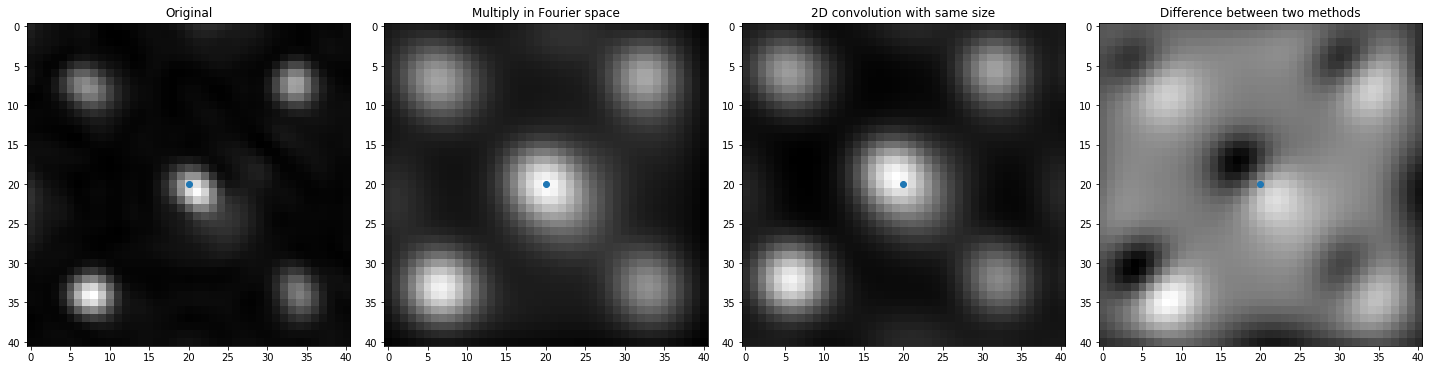

In [28]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
ax = axes.ravel()
ax[0].imshow(output[:,:,1,1], cmap=plt.cm.gray)
ax[0].scatter([20], [20])
ax[0].set_title('Original')

ax[1].imshow(scipy.signal.convolve2d(output[:,:,1,1], kernel, mode='same', boundary='fill', fillvalue=0), cmap=plt.cm.gray)
ax[1].scatter([20],[20])
ax[1].set_title('Multiply in Fourier space')

ax[2].imshow(result[:,:,1,1], cmap=plt.cm.gray)
ax[2].scatter([20],[20])
ax[2].set_title('2D convolution with same size')

ax[3].imshow(scipy.signal.convolve2d(output[:,:,1,1], kernel, mode='same', boundary='fill', fillvalue=0)-result[:,:,1,1], cmap=plt.cm.gray)
ax[3].scatter([20],[20])
ax[3].set_title('Difference between two methods')

fig.tight_layout()

plt.show()

When doing 2D convolution with multiply in Fourier space, the image is moved by (1,1) px in real space, probably due to how zero point is selected.

### Reconstruct a bright field image to determine the new Sr peak position in convoluted datacube

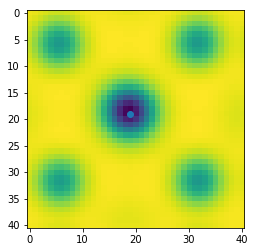

In [44]:
kx = np.linspace(-output.shape[2]/2,output.shape[2]/2-1,output.shape[2])
ky = np.linspace(-output.shape[3]/2,output.shape[3]/2-1,output.shape[3])
kx2,ky2 = np.meshgrid(kx,ky)
distance_from_center = np.sqrt(kx2**2 + ky2**2)
mask = distance_from_center<100
mask = mask*1
BF_recon = np.zeros((output.shape[0],output.shape[1]))
for ix in range(output.shape[0]):
    for iy in range(output.shape[1]):
        BF_recon[ix,iy] = np.sum(result[ix,iy,:,:]*mask)
        
plt.imshow(BF_recon)
plt.scatter([19],[19])

The new center in convoluted data is between (18,18) and (19,19)